In [6]:
#@title Import dependencies

import numpy as np
import matplotlib.pylab as plt

0.1999999943436137


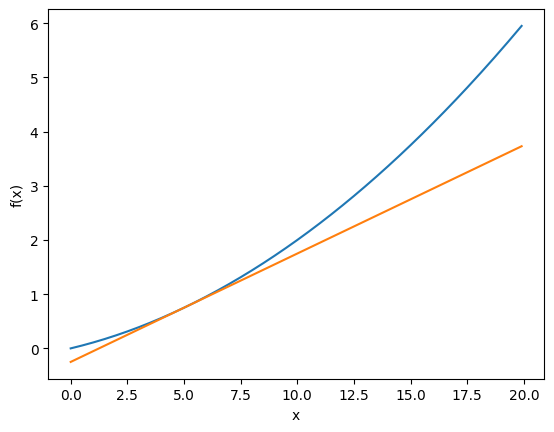

In [7]:
#@title Create an example of 1D gradient

def numerical_diff(f, x):
    h = 1e-8 # An extremely small value
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
tf = tangent_line(function_1, 5)
y2 = tf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

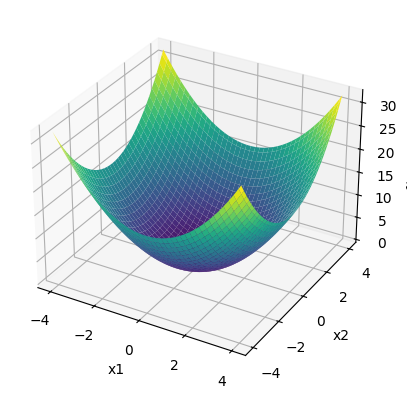

In [8]:
#@title Create an example of a 2-variable function

def f(x1, x2):
    return x1**2 + x2**2

# Generate data points
x = np.linspace(-4, 4, 80)
y = np.linspace(-4, 4, 80)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
# ax.set_title('Plot of f(x1, x2) = x1^2 + x2^2')
plt.show()

<ipython-input-9-fab55771ac76>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


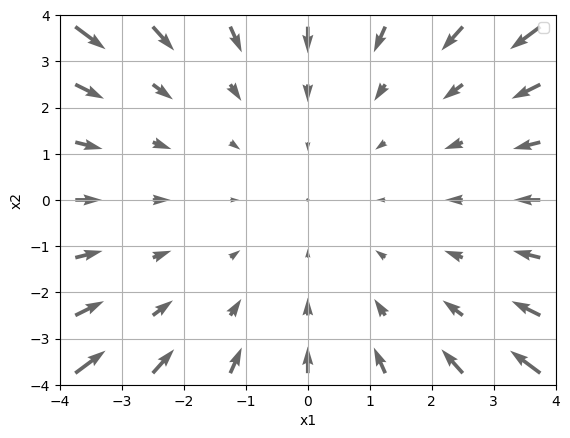

In [9]:
# #@title Show the 2D gradient for the 2-variable function
def _numerical_gradient_no_batch(f, x):
    h = 1e-5 # 0.00001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-5, 5, 1.25)
    x1 = np.arange(-5, 5, 1.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [10]:
#@title Calculate the numerical gradient
def num_grad(f, x):
    h = 1e-5 # 0.00001
    grad = np.zeros_like(x) # same size as x
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

# define a function
def f(x):
    return x[0]**2 + x[1]**2

# print some results
print(num_grad(f, np.array([1,2])))
print(num_grad(f, np.array([2,3])))

[ 49999 150000]
[150000 249999]
